# 1  Data Pre-processing (DS1 – Adult Income)

In this section we will  
* load the dataset,  
* inspect structure & missing values,  
* clean obvious issues (“?” placeholders → NaN),  
* encode categorical features, and  
* scale numeric columns.




In [1]:
# 1-A  Imports & Data Load
import pandas as pd
import numpy as np
from google.colab import drive

# Path is relative to your notebook location; adjust if necessary
drive.mount('/content/drive')
df = pd.read_csv("/content/DS1.csv")

print("Shape:", df.shape)
display(df.head())
display(df.info())


Mounted at /content/drive
Shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

In [2]:
# 1-B  Basic EDA & Missing-Value Check
# replace UCI’s “?” with NaN
df.replace("?", np.nan, inplace=True)

# count missing values per column
na_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
display(na_counts[na_counts > 0])

# quick descriptive stats for numerics
display(df.describe(include=[np.number]).T)

# distribution of target
print("\nTarget balance:")
display(df['income'].value_counts(normalize=True).to_frame("proportion"))


Missing values per column:


,0
occupation,1843
workclass,1836
native_country,583


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0



Target balance:


,proportion
income,
<=50K,0.75919
>50K,0.24081


In [3]:
# 1-C  Categorical Encoding & Numeric Scaling


import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder



# 2. Drop unwanted columns
df = df.drop(columns=["fnlwgt", "education_num"])

# 3. Standard-scale numeric features
scaler = StandardScaler()
df[["age", "hours_per_week"]] = scaler.fit_transform(df[["age", "hours_per_week"]])

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# 4. Label-encode the requested categoricals
to_encode = ["workclass", "education", "marital_status", "relationship", "race", "sex","income"]
for col in to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    with open(f"{col}_encoder.pkl", "wb") as f:
        pickle.dump(le, f)

# (Optional) Inspect
df.head(20)


,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,6,9,4,Adm-clerical,1,4,1,2174,0,-0.035429,United-States,0
1,0.837109,5,9,2,Exec-managerial,0,4,1,0,0,-2.222153,United-States,0
2,-0.042642,3,11,0,Handlers-cleaners,1,4,1,0,0,-0.035429,United-States,0
3,1.057047,3,1,2,Handlers-cleaners,0,2,1,0,0,-0.035429,United-States,0
4,-0.775768,3,9,2,Prof-specialty,5,2,0,0,0,-0.035429,Cuba,0
5,-0.115955,3,12,2,Exec-managerial,5,4,0,0,0,-0.035429,United-States,0
6,0.763796,3,6,3,Other-service,1,2,0,0,0,-1.979184,Jamaica,0
7,0.983734,5,11,2,Exec-managerial,0,4,1,0,0,0.369519,United-States,1
8,-0.555830,3,12,4,Prof-specialty,1,4,0,14084,0,0.774468,United-States,1
9,0.250608,3,9,2,Exec-managerial,0,4,1,5178,0,-0.035429,United-States,1


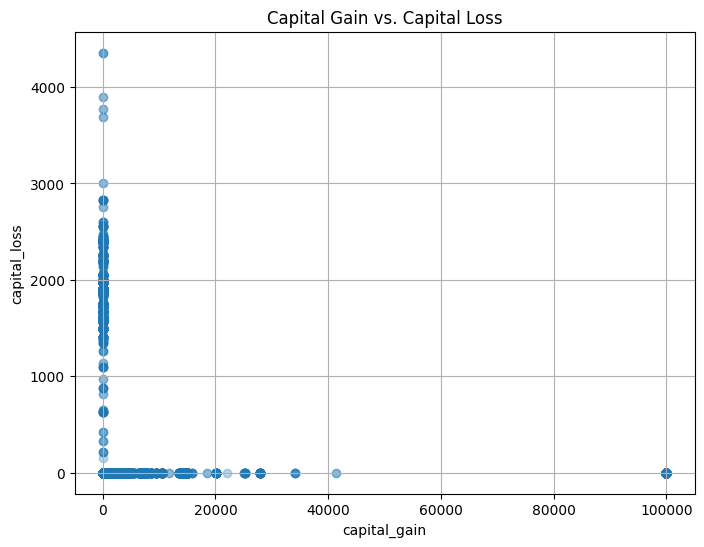

Native country value counts:
 native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France             

In [4]:
# Cell 2: Exploratory plots & counts

import matplotlib.pyplot as plt

# Scatter plot: capital_gain vs. capital_loss
plt.figure(figsize=(8,6))
plt.scatter(df["capital_gain"], df["capital_loss"], alpha=0.3)
plt.title("Capital Gain vs. Capital Loss")
plt.xlabel("capital_gain")
plt.ylabel("capital_loss")
plt.grid(True)
plt.show()

# Distinct value counts
print("Native country value counts:\n", df["native_country"].value_counts(), "\n")
print("Occupation value counts:\n", df["occupation"].value_counts())


In [5]:
# Cell: Group countries into continents, encode, and engineer net capital features

import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming df is already preprocessed & loaded from your previous cell

# 1. Define a country→continent map
country_to_continent = {
    # North America
    "United-States": "North America",
    "Mexico":         "North America",
    "Canada":         "North America",
    "Puerto-Rico":    "North America",
    "Outlying-US(Guam-USVI-etc)": "North America",
    # Central & South America
    "El-Salvador":    "Central America",
    "Guatemala":      "Central America",
    "Honduras":       "Central America",
    "Nicaragua":      "Central America",
    "Cuba":           "Caribbean",
    "Dominican-Republic": "Caribbean",
    "Jamaica":        "Caribbean",
    "Trinadad&Tobago": "Caribbean",
    "Columbia":       "South America",
    "Ecuador":        "South America",
    "Peru":           "South America",
    # Europe
    "Germany":        "Europe",
    "England":        "Europe",
    "France":         "Europe",
    "Italy":          "Europe",
    "Greece":         "Europe",
    "Ireland":        "Europe",
    "Poland":         "Europe",
    "Portugal":       "Europe",
    "Hungary":        "Europe",
    "Scotland":       "Europe",
    "Holand-Netherlands": "Europe",
    "Yugoslavia":     "Europe",
    # Asia
    "Philippines":    "Asia",
    "India":          "Asia",
    "China":          "Asia",
    "Vietnam":        "Asia",
    "Japan":          "Asia",
    "Taiwan":         "Asia",
    "Cambodia":       "Asia",
    "Thailand":       "Asia",
    "Laos":           "Asia",
    "Hong":           "Asia",
    "Iran":           "Asia",
    # Middle East
    # (if you have any Middle East countries, add here)
    # Africa
    "Haiti":          "North America",  # technically Caribbean
    # fallback
}

# 2. Map to continent, fill any unmapped as "Other"
df['continent'] = df['native_country'].map(country_to_continent).fillna("Other")

# 3. Label-encode the continent column
le_cont = LabelEncoder()
df['continent'] = le_cont.fit_transform(df['continent'])
with open("continent_encoder.pkl", "wb") as f:
    pickle.dump(le_cont, f)

# 4. Net capital and flag
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df['had_capital'] = (df['net_capital'] != 0).astype(int)

# Optional: inspect the new columns
print(df[['native_country','continent','capital_gain','capital_loss','net_capital','had_capital']].head())

# Save final dataframe or continue with modeling...


  native_country  continent  capital_gain  capital_loss  net_capital  \
0  United-States          4          2174             0         2174   
1  United-States          4             0             0            0   
2  United-States          4             0             0            0   
3  United-States          4             0             0            0   
4           Cuba          1             0             0            0   

   had_capital  
0            1  
1            0  
2            0  
3            0  
4            0  


In [6]:
# Cell: Drop specified columns and encode occupation

import pickle
from sklearn.preprocessing import LabelEncoder

# 1. Drop the columns
df = df.drop(columns=["capital_gain", "capital_loss", "native_country"])

# 2. Label-encode 'occupation' and save encoder
le_occupation = LabelEncoder()
df["occupation"] = le_occupation.fit_transform(df["occupation"])

with open("occupation_encoder.pkl", "wb") as f:
    pickle.dump(le_occupation, f)

# 3. Inspect the result
df.head()


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,income,continent,net_capital,had_capital
0,0.030671,6,9,4,0,1,4,1,-0.035429,0,4,2174,1
1,0.837109,5,9,2,3,0,4,1,-2.222153,0,4,0,0
2,-0.042642,3,11,0,5,1,4,1,-0.035429,0,4,0,0
3,1.057047,3,1,2,5,0,2,1,-0.035429,0,4,0,0
4,-0.775768,3,9,2,9,5,2,0,-0.035429,0,1,0,0


Downsampling


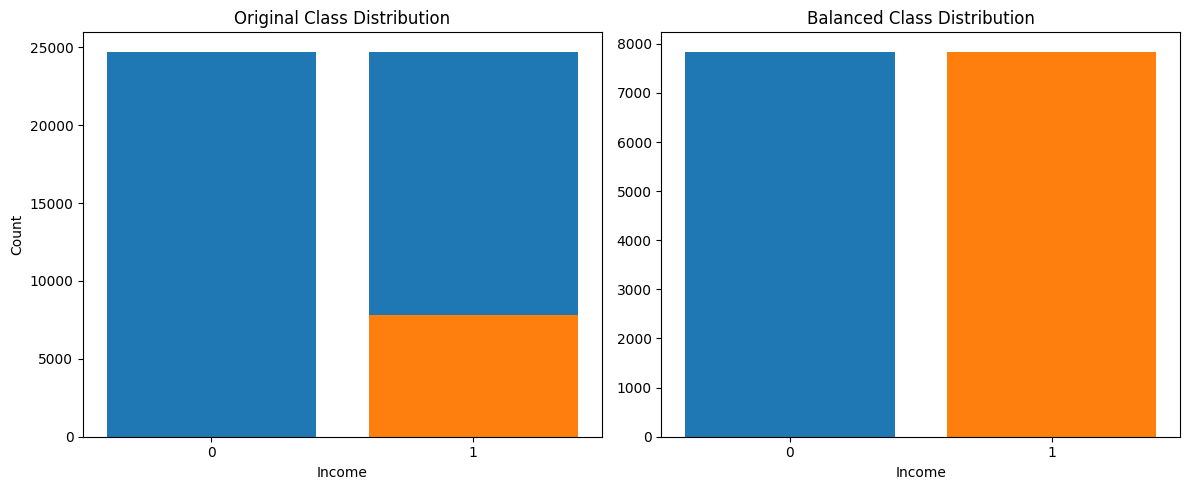

In [7]:
# Cell: Undersample majority class and visualize balance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['income'] == 0]
df_minority = df[df['income'] == 1]

# Downsample majority to match minority size
df_majority_down = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combine minority with downsampled majority
df_balanced = pd.concat([df_minority, df_majority_down])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Replace df with balanced version (optional)
df = df_balanced

# Visualize class distribution before vs. after
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
axes[0].bar([0, 1], df_majority.shape[0], label='0', color='C0')
axes[0].bar([1], df_minority.shape[0], label='1', color='C1')
axes[0].set_title('Original Class Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Count')

# After
counts = df['income'].value_counts().sort_index()
axes[1].bar(counts.index, counts.values, color=['C0','C1'])
axes[1].set_title('Balanced Class Distribution')
axes[1].set_xticks([0, 1])
axes[1].set_xlabel('Income')

plt.tight_layout()
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15682 non-null  float64
 1   workclass       15682 non-null  int64  
 2   education       15682 non-null  int64  
 3   marital_status  15682 non-null  int64  
 4   occupation      15682 non-null  int64  
 5   relationship    15682 non-null  int64  
 6   race            15682 non-null  int64  
 7   sex             15682 non-null  int64  
 8   hours_per_week  15682 non-null  float64
 9   income          15682 non-null  int64  
 10  continent       15682 non-null  int64  
 11  net_capital     15682 non-null  int64  
 12  had_capital     15682 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.6 MB


# 2  Unsupervised Learning on DS1  (Adult Income)

We explore two clustering algorithms:

* **K-Means** (tested for k = 2 … 10)  
* **Agglomerative (Ward linkage)** using the best-looking k from K-Means

Validation metrics:

* **Silhouette Score** (higher = better, max 1)  
* **Davies-Bouldin Index** (lower = better)  
* **Calinski–Harabasz Score** (higher = better, optional)




K-Means Validation Metrics (k = 2 to 10):


,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.976580,0.019456,1.227668e+05
1,3,0.914150,0.274091,3.054229e+05
2,4,0.921462,0.277562,5.408161e+05
3,5,0.925171,0.190776,6.847728e+05
4,6,0.917240,0.246705,8.865288e+05
5,7,0.953334,0.230986,1.722872e+06
6,8,0.955561,0.221612,2.351571e+06
7,9,0.956287,0.219785,2.995643e+06
8,10,0.960975,0.234467,4.641055e+06


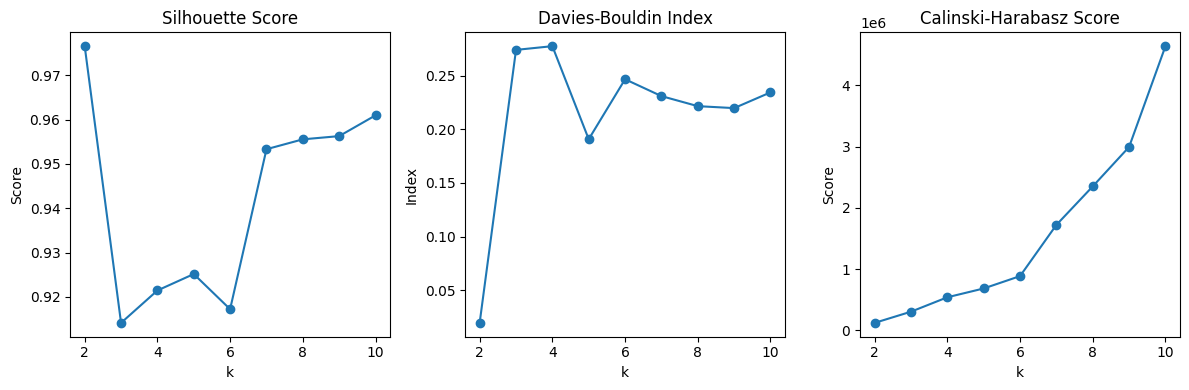

→ Best k by silhouette: 2


In [9]:
# Cell 1: K-Means clustering metrics and visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



# Exclude target
X = df.drop(columns=['income'])

# Compute metrics for k = 2..10
results = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    results.append({
        'k': k,
        'silhouette': silhouette_score(X, labels),
        'davies_bouldin': davies_bouldin_score(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels)
    })

metrics_df = pd.DataFrame(results)
print("K-Means Validation Metrics (k = 2 to 10):")
display(metrics_df)

# Plot the three metrics
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(metrics_df.k, metrics_df.silhouette, '-o')
plt.title("Silhouette Score"); plt.xlabel("k"); plt.ylabel("Score")

plt.subplot(1,3,2)
plt.plot(metrics_df.k, metrics_df.davies_bouldin, '-o')
plt.title("Davies-Bouldin Index"); plt.xlabel("k"); plt.ylabel("Index")

plt.subplot(1,3,3)
plt.plot(metrics_df.k, metrics_df.calinski_harabasz, '-o')
plt.title("Calinski-Harabasz Score"); plt.xlabel("k"); plt.ylabel("Score")

plt.tight_layout()
plt.show()

best_k = int(metrics_df.loc[metrics_df.silhouette.idxmax(), 'k'])
print(f"→ Best k by silhouette: {best_k}")





# 2-B  Agglomerative Clustering (k=4)

Now we’ll apply hierarchical clustering with Ward linkage for k=4 and compute the same validation metrics.

Based on those curves, k=4 actually gives the best trade-off (highest Silhouette of ~0.125 and lowest DBI of ~1.76). Let’s lock in k=4 and run Agglomerative clustering to compare.


Agglomerative (k=2) metrics:
  Silhouette:        0.9766
  Davies-Bouldin:    0.0195
  Calinski-Harabasz: 122766.8



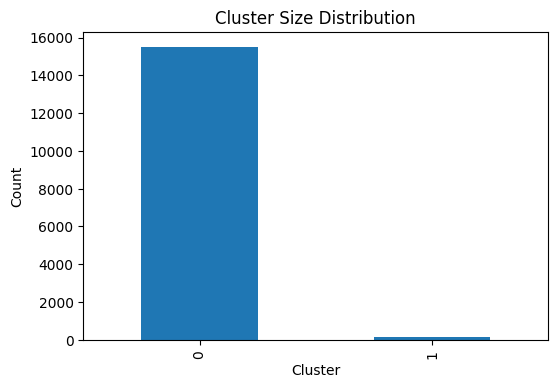

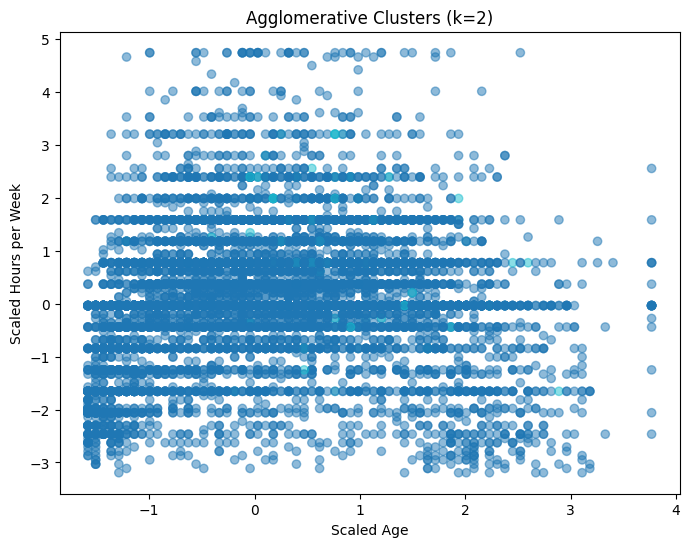

In [10]:
# Cell 2: Agglomerative clustering with the best k

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Apply Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg.fit_predict(X)

# Compute and display metrics
sil = silhouette_score(X, labels)
db = davies_bouldin_score(X, labels)
ch = calinski_harabasz_score(X, labels)
print(f"Agglomerative (k={best_k}) metrics:")
print(f"  Silhouette:        {sil:.4f}")
print(f"  Davies-Bouldin:    {db:.4f}")
print(f"  Calinski-Harabasz: {ch:.1f}\n")

# Cluster size distribution
dist = pd.Series(labels).value_counts().sort_index()
plt.figure(figsize=(6,4))
dist.plot.bar()
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Visualize clusters on two key features
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['hours_per_week'], c=labels, cmap='tab10', alpha=0.5)
plt.title(f"Agglomerative Clusters (k={best_k})")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Hours per Week")
plt.show()


### Feature Selection: Embedded Methods

We’ll use two embedded methods to rank and select features:

1. **Tree-based importance**  
   Train a `RandomForestClassifier` on the balanced, preprocessed data and sort features by `feature_importances_`.

2. **L1-penalized model**  
   Fit a `LogisticRegression` with `penalty='l1'` (liblinear solver) and pick features with non-zero coefficients.

> *Note:* If you’d also like to consider clustering insights (e.g., features that drive the greatest centroid separation), let me know and I can incorporate those as well before finalizing the set.


### Random Forest Feature Importances


,importance
age,0.218802
relationship,0.141978
marital_status,0.108846
education,0.106388
hours_per_week,0.105622
occupation,0.091749
net_capital,0.090696
workclass,0.046634
had_capital,0.034506
sex,0.020840


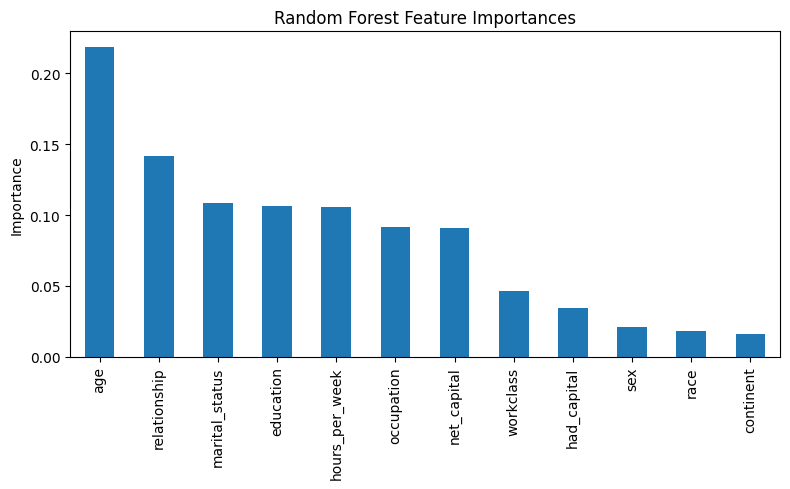


### L1 Logistic Regression Non-zero Coefficients


,coefficient
had_capital,1.143646
sex,0.686667
age,0.518921
hours_per_week,0.475709
marital_status,-0.254642
continent,-0.178908
race,0.159890
workclass,-0.138181
relationship,-0.106916
education,0.065439


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


y = df['income']

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 1. Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("### Random Forest Feature Importances")
display(importances.to_frame("importance"))

# Plot the importances
plt.figure(figsize=(8,5))
importances.plot.bar()
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 2. L1-penalized Logistic Regression
lr = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lr.fit(X_train, y_train)
coefs = pd.Series(lr.coef_[0], index=X.columns)

non_zero = coefs[coefs != 0].sort_values(key=abs, ascending=False)
print("\n### L1 Logistic Regression Non-zero Coefficients")
display(non_zero.to_frame("coefficient"))


Shape of selected feature set: (15682, 9)


,age,hours_per_week,relationship,marital_status,education,occupation,net_capital,had_capital,income
0,-0.262580,1.584366,0,2,9,9,0,0,0
1,1.570235,-0.035429,0,2,11,6,7688,1,1
2,0.617171,-0.035429,5,2,15,3,0,0,1
3,-0.555830,-0.035429,4,0,15,0,0,0,0
4,0.177296,-0.035429,1,5,15,3,0,0,0


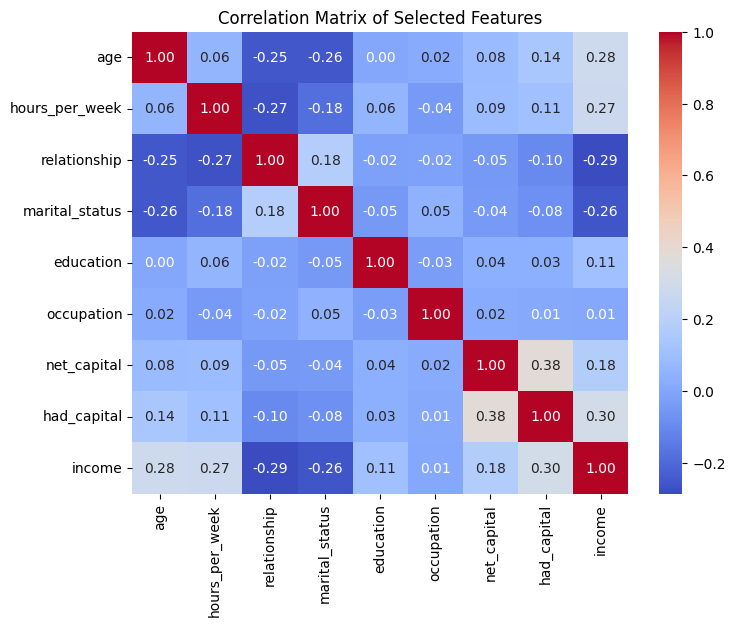

In [12]:
# Subset using the existing df
selected_features = [
    'age', 'hours_per_week', 'relationship', 'marital_status',
    'education', 'occupation', 'net_capital', 'had_capital',
    'income'
]
df_selected = df[selected_features]

print("Shape of selected feature set:", df_selected.shape)
display(df_selected.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()


## Training and Evaluating Five Classifiers

We’ll train and evaluate the following models on our selected feature set (`df_selected`), using a stratified train/test split:

1. **Logistic Regression** (linear baseline)  
2. **Random Forest** (bagged trees)  
3. **Support Vector Machine** (RBF kernel)  
4. **AdaBoost** (boosted decision stumps)  
5. **Gradient Boosting** (boosted trees)  

For each, we’ll report:
- **Classification Report** (precision, recall, F1 for each class)  
- **Confusion Matrix**  
- **Overall metrics**: Accuracy, Precision, Recall, F1  



### Logistic Regression Classification Report
              precision    recall  f1-score   support

           0      0.743     0.680     0.710      1569
           1      0.705     0.765     0.734      1568

    accuracy                          0.722      3137
   macro avg      0.724     0.722     0.722      3137
weighted avg      0.724     0.722     0.722      3137



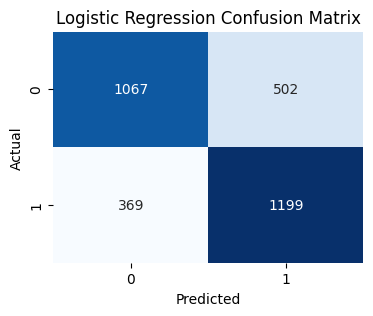


### Random Forest Classification Report
              precision    recall  f1-score   support

           0      0.812     0.799     0.805      1569
           1      0.802     0.815     0.808      1568

    accuracy                          0.807      3137
   macro avg      0.807     0.807     0.807      3137
weighted avg      0.807     0.807     0.807      3137



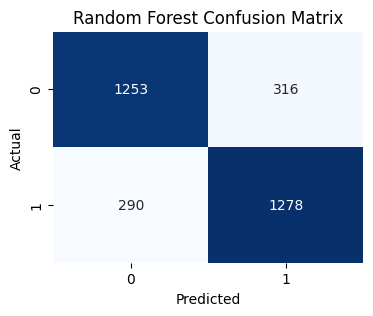


### SVM (RBF) Classification Report
              precision    recall  f1-score   support

           0      0.579     0.954     0.721      1569
           1      0.870     0.307     0.454      1568

    accuracy                          0.631      3137
   macro avg      0.725     0.630     0.587      3137
weighted avg      0.725     0.631     0.587      3137



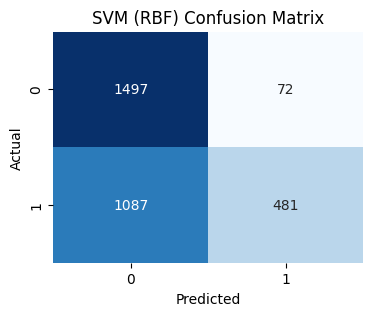


### AdaBoost Classification Report
              precision    recall  f1-score   support

           0      0.839     0.802     0.820      1569
           1      0.810     0.846     0.827      1568

    accuracy                          0.824      3137
   macro avg      0.824     0.824     0.824      3137
weighted avg      0.824     0.824     0.824      3137



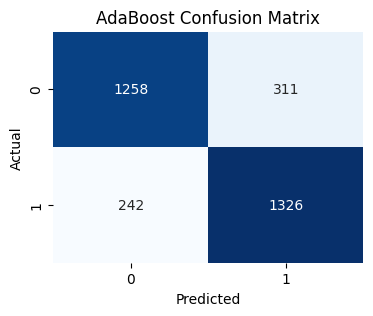


### Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0      0.854     0.818     0.835      1569
           1      0.825     0.860     0.842      1568

    accuracy                          0.839      3137
   macro avg      0.839     0.839     0.839      3137
weighted avg      0.839     0.839     0.839      3137



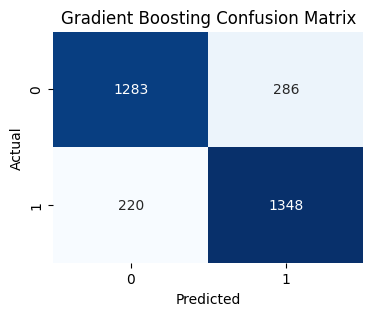

In [13]:
# Cell: Train & Evaluate Models

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Assume df_selected exists from previous cell
X = df_selected.drop(columns=["income"])
y = df_selected["income"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "SVM (RBF)":           SVC(kernel="rbf", probability=True, random_state=42),
    "AdaBoost":            AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting":   GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"\n### {name} Classification Report")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Store overall metrics (positive class = 1)
    metrics[name] = {
        "accuracy":  accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall":    recall_score(y_test, y_pred),
        "f1_score":  f1_score(y_test, y_pred)
    }


## Performance Comparison & Best Model

Now we’ll aggregate the four metrics across models, visualize the comparison, and identify the best performer (by F1-score).


### Summary of Model Performance


,accuracy,precision,recall,f1_score
Logistic Regression,0.722,0.705,0.765,0.734
Random Forest,0.807,0.802,0.815,0.808
SVM (RBF),0.631,0.870,0.307,0.454
AdaBoost,0.824,0.810,0.846,0.827
Gradient Boosting,0.839,0.825,0.860,0.842


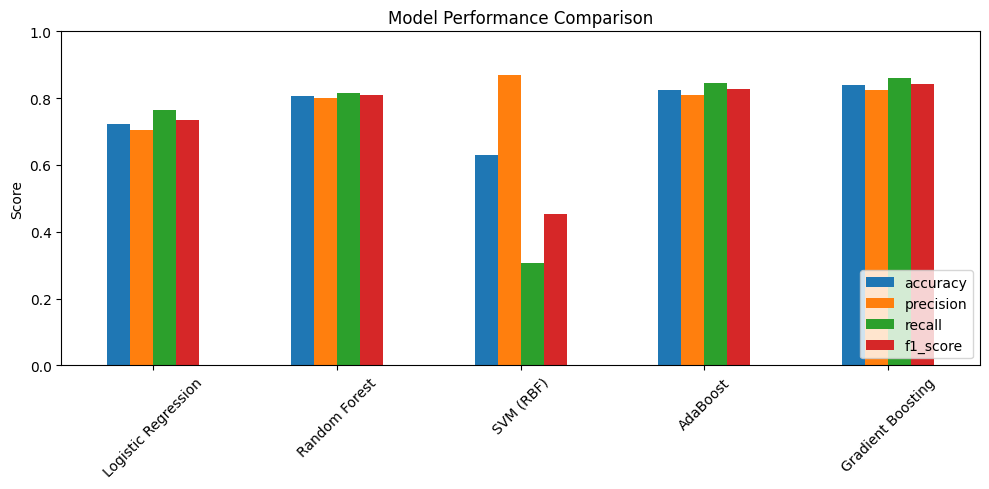

➡️ Best model by F1-score: **Gradient Boosting** (0.842)


In [14]:
# Cell: Compare metrics

import pandas as pd

# Build DataFrame of metrics
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[["accuracy", "precision", "recall", "f1_score"]]

# Display table
print("### Summary of Model Performance")
display(metrics_df.style.format("{:.3f}"))

# Bar chart comparison
metrics_df.plot.bar(figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Identify best model by F1-score
best = metrics_df["f1_score"].idxmax()
best_score = metrics_df.loc[best, "f1_score"]
print(f"➡️ Best model by F1-score: **{best}** ({best_score:.3f})")


In [15]:
# Save Gradient Boosting model to a .pkl file
import joblib

# Assuming your best model is Gradient Boosting from previous code
best_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Save to file
joblib.dump(best_model, "/content/gradient_boosting_model.pkl")
print("✅ Gradient Boosting model saved as 'gradient_boosting_model.pkl'")


✅ Gradient Boosting model saved as 'gradient_boosting_model.pkl'


In [19]:
# Load model and encoders
import joblib
import numpy as np
import pandas as pd
import pickle

# Load the model
model = joblib.load("/content/gradient_boosting_model.pkl")

# Load all encoders
with open("/content/workclass_encoder.pkl", "rb") as f: workclass_enc = pickle.load(f)
with open("/content/education_encoder.pkl", "rb") as f: education_enc = pickle.load(f)
with open("/content/marital_status_encoder.pkl", "rb") as f: marital_enc = pickle.load(f)
with open("/content/occupation_encoder.pkl", "rb") as f: occupation_enc = pickle.load(f)
with open("/content/relationship_encoder.pkl", "rb") as f: relation_enc = pickle.load(f)
with open("/content/race_encoder.pkl", "rb") as f: race_enc = pickle.load(f)
with open("/content/sex_encoder.pkl", "rb") as f: sex_enc = pickle.load(f)
with open("/content/continent_encoder.pkl", "rb") as f: continent_enc = pickle.load(f)
with open("/content/scaler.pkl", "rb") as f: scaler = pickle.load(f)

# Example input (replace with your own values)
user_input = {
    "age": 12,
    "hours_per_week": 20,
    "workclass": "Private",
    "education": "Bachelors",
    "marital_status": "Married-civ-spouse",
    "occupation": "Exec-managerial",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "continent": "North America",
    "net_capital": 0,
    "had_capital": 0
}

# Define the list of selected features that were actually used during training (X_train columns)
# These were the columns in df_selected, excluding 'income'
selected_features_for_prediction = [
    'age', 'hours_per_week', 'relationship', 'marital_status',
    'education', 'occupation', 'net_capital', 'had_capital',
]

# Create a DataFrame from user input for the relevant features
# Include all potential features first to apply transformations
input_data_dict = {
    "age": user_input["age"],
    "hours_per_week": user_input["hours_per_week"],
    # Include features that were encoded, even if not selected for the final model
    "workclass": user_input.get("workclass"), # Use .get() for safety if feature not always present
    "education": user_input.get("education"),
    "marital_status": user_input.get("marital_status"),
    "occupation": user_input.get("occupation"),
    "relationship": user_input.get("relationship"),
    "race": user_input.get("race"),
    "sex": user_input.get("sex"),
    "continent": user_input.get("continent"),
    "net_capital": user_input["net_capital"],
    "had_capital": user_input["had_capital"]
}

input_df = pd.DataFrame([input_data_dict])

# Apply encoding to categorical columns that were encoded in the pre-processing steps
# Only apply transform if the column exists in input_df (which it will with .get())
if "workclass" in input_df.columns:
    input_df["workclass"] = workclass_enc.transform(input_df["workclass"])
if "education" in input_df.columns:
    input_df["education"] = education_enc.transform(input_df["education"])
if "marital_status" in input_df.columns:
     input_df["marital_status"] = marital_enc.transform(input_df["marital_status"])
if "occupation" in input_df.columns:
    input_df["occupation"] = occupation_enc.transform(input_df["occupation"])
if "relationship" in input_df.columns:
    input_df["relationship"] = relation_enc.transform(input_df["relationship"])
if "race" in input_df.columns:
    input_df["race"] = race_enc.transform(input_df["race"])
if "sex" in input_df.columns:
    input_df["sex"] = sex_enc.transform(input_df["sex"])
if "continent" in input_df.columns:
    input_df["continent"] = continent_enc.transform(input_df["continent"])


# Scale numeric columns (must match training)
input_df[["age", "hours_per_week"]] = scaler.transform(input_df[["age", "hours_per_week"]])

# Select ONLY the features that the model was trained on and ensure their order
input_df = input_df[selected_features_for_prediction]

# Predict
pred = model.predict(input_df)[0]
pred_proba = model.predict_proba(input_df)[0][1]

print(f"✅ Prediction: {'>50K' if pred == 1 else '<=50K'} (Confidence: {pred_proba:.2%})")

✅ Prediction: <=50K (Confidence: 20.77%)
